# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *O.*

**Names:**

* *Argelaguet Franquelo, Pau*
* *Maillard, Mathias*
* *du Bois de Dunilac, Vivien*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
%matplotlib inline
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import collections
import operator
import random
import numpy as np
import json
from random import choice
import epidemics_helper

---

## 2.3 Epidemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [2]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [3]:
G = read_json_file("../data/nyc_augmented_network.json")
print("Number of edges :", G.number_of_edges())
print("Number of nodes :", G.number_of_nodes())

Number of edges : 43437
Number of nodes : 26481


In [4]:
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 104.98 days | 104.98 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


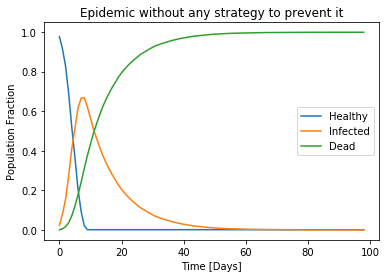

In [5]:
def print_stats(epidemic, step, stop):
    counter = 1
    result_list = []
    while(counter < stop):
        inf_array = epidemic.inf_time
        rec_array = epidemic.rec_time
        n = G.number_of_nodes()
        R = len(np.where(rec_array < counter)[0])
        I = len(np.where(inf_array < counter)[0]) - R
        S = n - R - I
        result_list.append(S/n)
        result_list.append(I/n)
        result_list.append(R/n)
        counter += step
    return np.array(result_list).reshape(int(len(result_list)/3), 3)
    
plt.legend(plt.plot(print_stats(sir, 1, 100)), ['Healthy', 'Infected', 'Dead'])
plt.xlabel('Time [Days]')
plt.ylabel('Population Fraction')
plt.title('Epidemic without any strategy to prevent it')
plt.show()

From the graph we can see that 60% of the population is infected after six days. We can also observe that 60% of the population dies after seventeen days.

In [6]:
def get_node_colors(sir, G, time):
    array = np.zeros(G.number_of_nodes())
    rec_array = sir.rec_time
    for i in np.where(rec_array < time):
        array[i] += 0.5
        
    inf_array = sir.inf_time
    for i in np.where(inf_array < time):
        array[i] += 0.5
        
    return array

In all the following epidemic graphs, the color coding is purple for healthy, light blue for infected and yellow for dead.

The epidemic after 1 day

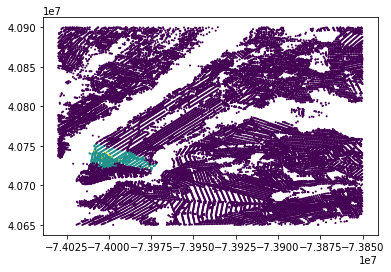

In [7]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 1))

The epidemic after 3 days

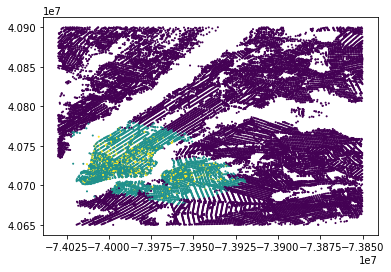

In [8]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 3))

The epidemic after 30 days

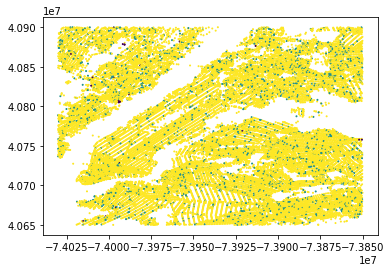

In [9]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 30))

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [10]:
"""Simulate a given strategy on the nyc graph using the given parameters, the
   SIR simulation object of the last simulation is returned."""

def simulate_strategy(strategy, n_edges, n_simulations, time_limit):
    G = read_json_file("../data/nyc_augmented_network.json")
    strategy(G, n_edges)
    print(G.number_of_edges())
    S_count = 0
    I_count = 0
    R_count = 0
    n_nodes = G.number_of_nodes()
    for sim in range(n_simulations):
        sir2 = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
        sir2.launch_epidemic(source=random.randint(0, n_nodes), max_time=time_limit)
        inf_array = sir2.inf_time
        rec_array = sir2.rec_time
        R = (len(np.where(rec_array < time_limit)[0]))
        I = (len(np.where(inf_array < time_limit)[0]) - R)
        S = (n_nodes - R - I)
        S_count += S/n_nodes
        I_count += I/n_nodes
        R_count += R/n_nodes
        if (sim == n_simulations - 1):
            print(S_count/n_simulations, I_count/n_simulations, R_count/n_simulations)
            return sir2


In [11]:
def remove_random_edges(G, n_edges):
    keys = np.array(list(G.edges()))
    counter = 0
    for i in range(n_edges):
        c = choice(range(len(keys)))
        try:
            G.remove_edge(keys[c][0], keys[c][1])
        except:
            counter+=1
    print(counter)

In [12]:
sir2 = simulate_strategy(remove_random_edges, 1000, 10, 30)

12
42449
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.3% susceptible, 10.3% infected, 89.4% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.2% susceptible, 11.3% infected, 88.5% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.6% susceptible, 13.8% infected, 85.6% recovered
Epidemic stopped after 30.01 days | 30.01 days elapsed | 0.3% susceptible, 9.3% infected, 90.5% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.3% susceptible, 12.9% infected, 86.9% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.3% susceptible, 8.6% infected, 91.1% recovered
Epidemic stopped after 30.02 days | 30.02 days elapsed | 0.2% susceptible, 11.8% infected, 88.0% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.3% susceptible, 12.8% infected, 86.9% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.2% susceptible, 9.4% infected, 90.3% recovered
Epidemic stopped after 30.00 da

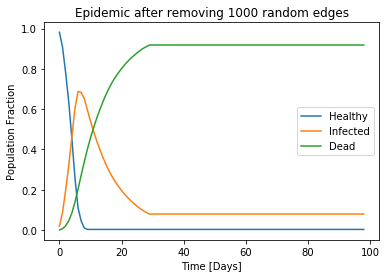

In [13]:
plt.legend(plt.plot(print_stats(sir2, 1, 100)), ['Healthy', 'Infected', 'Dead'])
plt.xlabel('Time [Days]')
plt.ylabel('Population Fraction')
plt.title('Epidemic after removing 1000 random edges')
plt.show()

Overall removing random edges barely improves the chances of saving a significant part of the population. Sometimes the epidemic starts in a node that is completely disconnected from the rest of the graph and the whole city is saved but in a more standard case the random strategy changes nothing.

#### Exercise 2.11: Strategy 2

In [14]:
""" Helper function that prints the number of connected compoenents in a given nx graph and prints the size
    of the largest connected component. """

def cc_stats(G):
    connected_component = nx.connected_components(G)
    count = 0
    degrees = list()
    for c in connected_component:
        degrees.append(len(c))
        count+=1
    print("There are", count, "connected components in the graph.")
    print("The largest CC has", max(degrees), "nodes.")

In [15]:
""" Helper function that removes all of the edges between two groups of nodes in an nx graph and returns the number
    of edges that had to be removed. """

def remove_edges_between_parts(G, p, sub_graph):
    counter = 0
    for e in list(sub_graph.edges()):
        if(((e[0] in p) & (not(e[1] in p))) | ((e[1] in p) & (not(e[0] in p)))):
            counter += 1
            G.remove_edge(e[0], e[1])
    return counter

With the given parameters for the epidemic it has a very good chance of killing every person that is reachable from
the point of origin. With this in mind, our strategy to save the most people is to separate the city in a lot of
small district (connected components). To achieve this goal we select a random node in the largest CC of the graph
and take all of the nodes that are reachable in a certain number of steps from it. Then we disconnect this subgraph
from the rest of the graph and start again until the target number of edges has been reached. When the algorithm sees
that the size of the subgraph it tries to disconnect is too large it reduces the target distance to avoid looping
forever.

The subgraph of reachable neighbors is computed using nx.egograph.

In [16]:
""" A strategy to prevent the epidemic that tries to create as many connected compenents as possible in the graph. """

def disconnect_subgraphs(G, n_edges):
    removed = 0
    radius = 50
    while(removed < n_edges):
        Gc = max(nx.connected_component_subgraphs(G), key=len)
        delta = removed
        removed += remove_edges_between_parts(G, list(nx.ego_graph(G, choice(np.array(list(Gc.nodes()))), radius=radius).nodes()), Gc)
        delta = delta - removed
        if(delta == 0):
            radius -= 15
        if(radius < 5):
            return removed
        
    return removed

In [17]:
sir = simulate_strategy(disconnect_subgraphs, 2500, 10, 30)

40888
Epidemic stopped after 30.00 days | 30.00 days elapsed | 95.6% susceptible, 0.3% infected, 4.2% recovered
Epidemic stopped after 30.08 days | 30.08 days elapsed | 95.9% susceptible, 0.3% infected, 3.8% recovered
Epidemic stopped after 34.21 days | 34.21 days elapsed | 99.9% susceptible, 0.0% infected, 0.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 95.4% susceptible, 0.3% infected, 4.2% recovered
Epidemic stopped after 30.40 days | 30.40 days elapsed | 97.6% susceptible, 0.2% infected, 2.2% recovered
Epidemic stopped after 30.15 days | 30.15 days elapsed | 98.8% susceptible, 0.1% infected, 1.1% recovered
Epidemic stopped after 30.46 days | 30.46 days elapsed | 95.6% susceptible, 0.3% infected, 4.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 96.3% susceptible, 0.2% infected, 3.4% recovered
Epidemic stopped after 30.21 days | 30.21 days elapsed | 97.7% susceptible, 0.1% infected, 2.2% recovered
Epidemic stopped after 30.08 days | 30.0

With the given parameters for the epidemic and after removing 2500 edges from the graph using our strategy 98% of the
population survives the epidemic after 30 days. Below are graphs showing the evolution of a simulation of the epidemic
on the graph after having applied the strategy.

The color coding is similar as for the first epidemic graphs, purple means healthy, light blue means infected and yellow
means dead.

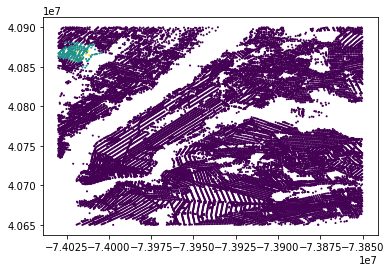

In [18]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 1))

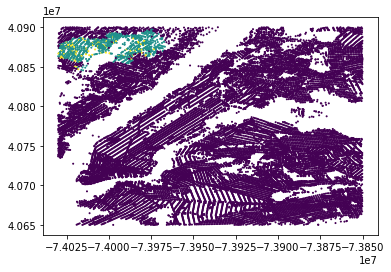

In [19]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 3))

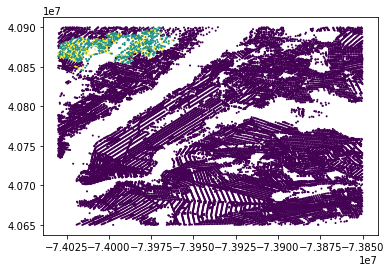

In [20]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 5))

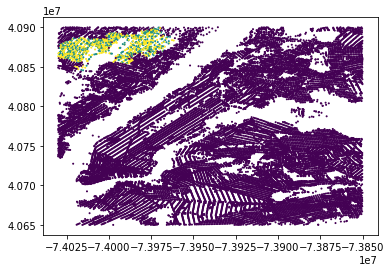

In [21]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 10))

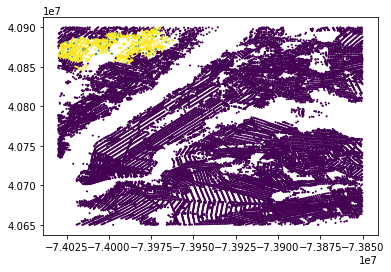

In [22]:
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=1, node_color=get_node_colors(sir, G, 30))